<!-- <font size="+3" color='#053c96'><b>Health Insurance Cross Sell Predictor</b></font> -->
<!-- <font size="+3" color='#00008b'><b>Health Insurance Cross Sell Predictor</b></font> -->
<div style="text-align: center;">
    <font size="+3" color='#8b0000'><b>Health Insurance Cross Sell Classifier</b></font>
</div>


## Context

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# 1. Exploratory Data Analysis (EDA)

In [56]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [59]:
test_plot = test.copy()

In [3]:
num_duplicate_rows = len(train[train.duplicated()])
print(f"Number of duplicate records: {num_duplicate_rows}")

Number of duplicate records: 0


In [4]:
train.shape

(381109, 12)

In [5]:
train = train.drop_duplicates()
train.shape

(381109, 12)

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Check for missing values

In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No missing data

## Exploratory Data Analysis

In [8]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

#### Unique Types of categorical features

In [10]:
unique_counts = {col: train[col].nunique() for col in categorical_columns}

# Convert the dictionary to a pandas DataFrame for better readability (optional)
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Types'])

# Display the results
print(unique_counts_df)

               Column  Unique Types
0              Gender             2
1     Driving_License             2
2  Previously_Insured             2
3         Vehicle_Age             3
4      Vehicle_Damage             2
5            Response             2


* **2-3 types of all categorical features & no order there, get_dummies is good**

## Check Target Variable

In [11]:
import warnings
warnings.filterwarnings("ignore")

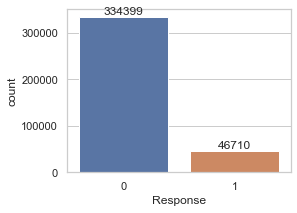

In [12]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=train, x='Response')
# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

* **imbalanced dataset**

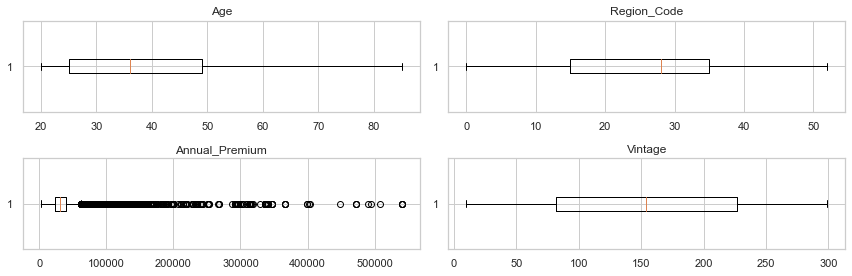

In [15]:
# check for outliers for numerical_columns:
# Visual Inspection with Box Plots:
plt.figure(figsize=(12, 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    plt.boxplot(train[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()


* **outliers found for Annual_Premium: may use RobustScaler later**

Number of outliers detected in Annual_Premium: 10320
Number of different Response types for outliers in Annual_Premium:
0    8765
1    1555
Name: Response, dtype: int64
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
25          26  Female   21                1         28.0                   1   
37          38  Female   25                1         28.0                   1   
67          68    Male   60                1         28.0                   0   
139        140    Male   21                1         29.0                   1   
149        150  Female   22                1         11.0                   1   
...        ...     ...  ...              ...          ...                 ...   
380959  380960    Male   25                1          8.0                   1   
380998  380999  Female   33                1          8.0                   0   
381035  381036  Female   22                1         11.0                   1   
381047  381048  Femal

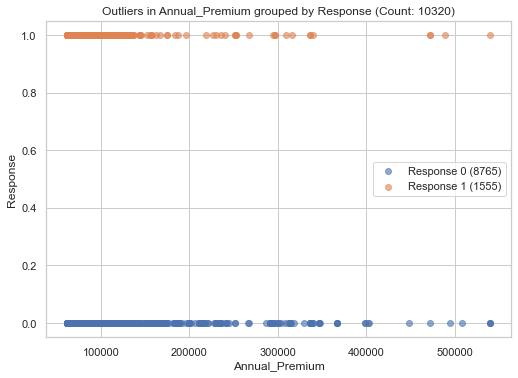

In [23]:
# Dictionary to store outliers and counts
outliers_dict = {}

for col in numerical_columns:
    # Calculate IQR for the column
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers for the column
    outliers = train[(train[col] < (Q1 - 1.5 * IQR)) | (train[col] > (Q3 + 1.5 * IQR))]
    outliers_count = outliers.shape[0]
    
    if outliers_count > 0:
        outliers_dict[col] = (outliers, outliers_count)

# Print outliers information and number of different Response types for outliers
for col, (outliers, count) in outliers_dict.items():
    response_counts_outliers = outliers['Response'].value_counts()
    print(f'Number of outliers detected in {col}: {count}')
    print(f'Number of different Response types for outliers in {col}:')
    print(response_counts_outliers)
    print(outliers)

# Plot outliers grouped by Response
plt.figure(figsize=(14, 10))
for i, (col, (outliers, count)) in enumerate(outliers_dict.items()):
    plt.subplot(2, 2, i+1)
    response_counts_outliers = outliers['Response'].value_counts()
    for response in outliers['Response'].unique():
        subset = outliers[outliers['Response'] == response]
        plt.scatter(subset[col], subset['Response'], label=f'Response {response} ({response_counts_outliers[response]})', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Response')
    plt.title(f'Outliers in {col} grouped by Response (Count: {count})')
    plt.legend()

plt.tight_layout()
plt.show()

* **outliers for Annual_Premium have both Response yes & no: meaningful data; use RobustScaler later**

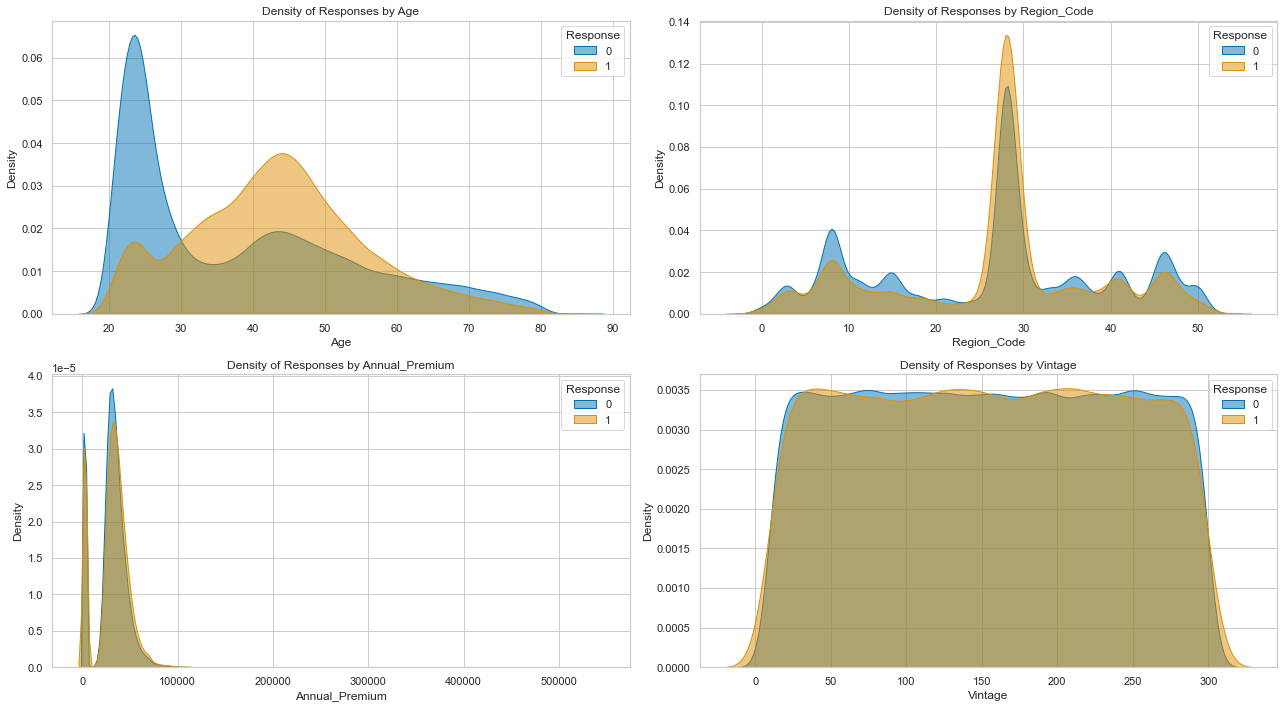

In [58]:
# plot distribution of numerical_columns by Response

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each numerical column and create a density plot
for i, num_col in enumerate(numerical_columns):
    # Get the unique 'Response' categories in sorted order
    sorted_responses = sorted(train['Response'].unique())
    
    # Iterate over each unique 'Response' category
    for j, response_category in enumerate(sorted_responses):
        # Reverse the order of colors for the two curves
#         colors = sns.color_palette("colorblind", 2)[::-1]
        colors = sns.color_palette("colorblind", 2)
        color = colors[j % 2]  # Cycle through two colors
        
        sns.kdeplot(
            x=num_col,
            data=train[train['Response'] == response_category],
            ax=axes[i],
            fill=True,
            alpha=0.5,
            label=response_category,
            common_norm=False,  # Normalize within each hue category
            color=color  # Assign the reversed color to the current curve
        )
    
    axes[i].set_title(f'Density of Responses by {num_col}')
    
    # Manually add legend
    axes[i].legend(title='Response')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* **Insight:higher Age more likely to be Response Yes**

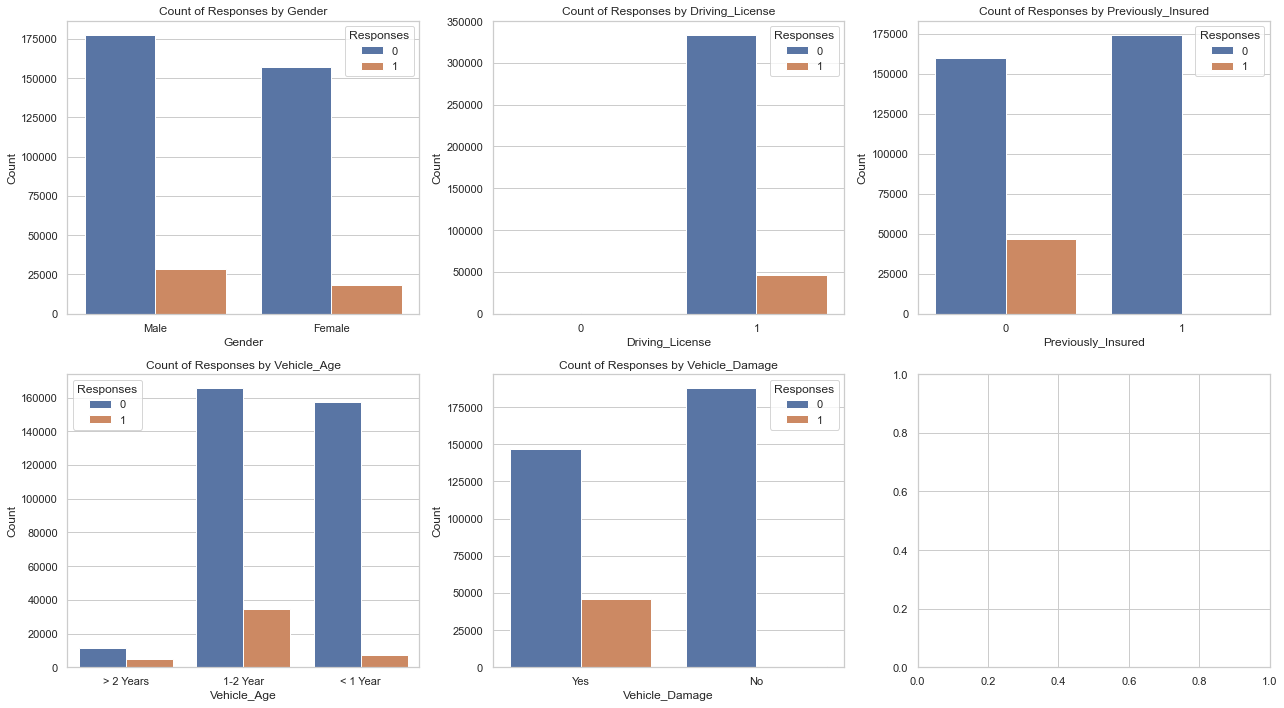

In [25]:
# List of categorical columns to plot
cat_col_plot = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each categorical column and create a countplot
for i, cat_col in enumerate(cat_col_plot):
    sns.countplot(x= cat_col, hue='Response', data=train, ax=axes[i])
    axes[i].set_title(f'Count of Responses by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Responses')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* **Notable trend: Customers 1. Previously_Insured & 2. no Vehicle_Damage in the past show low Responses**

#### data correlation

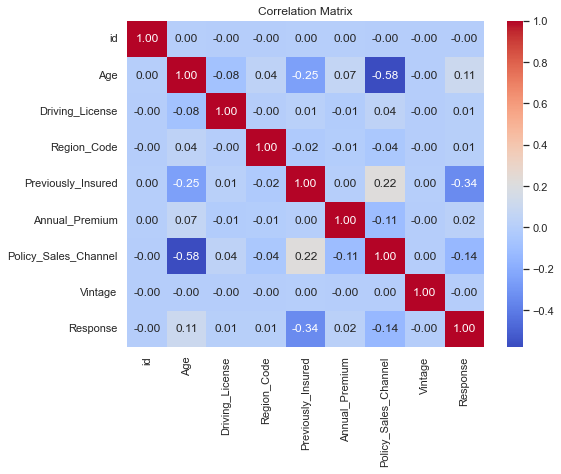

In [26]:
corr_matrix = train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* **Again, Response is negatively correlated Previously_Insured**

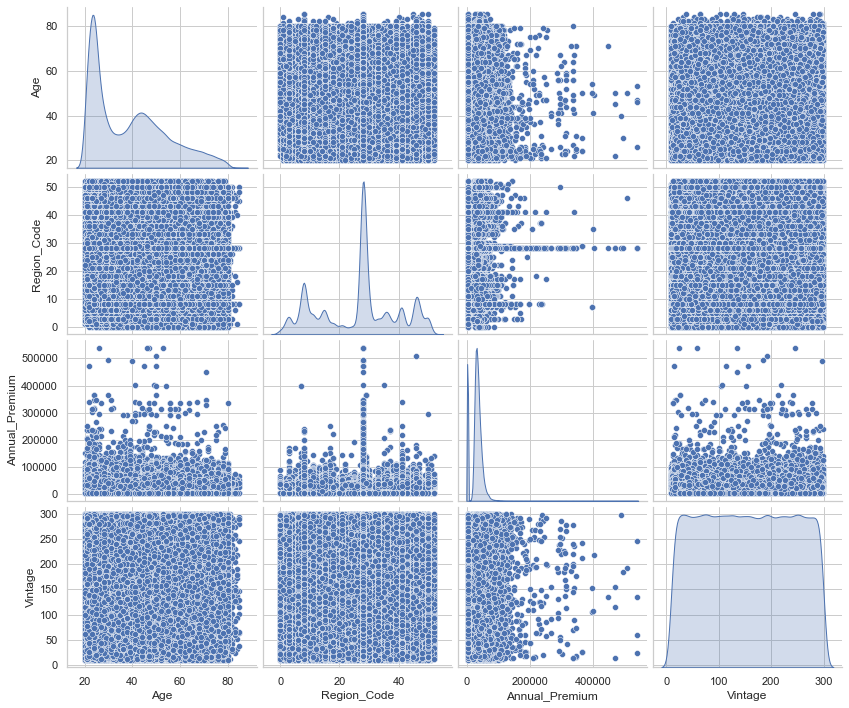

In [40]:
# sns.pairplot(train[numerical_columns])
# plt.show()

g = sns.pairplot(train[numerical_columns], diag_kind='kde', height=2.5, aspect=1.2)


# 2. Data Preprocessing

In [13]:
# num_feat = ['Age','Vintage']
# cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [13]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [14]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [15]:
train=pd.get_dummies(train,drop_first=True)

In [16]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [17]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [18]:
# Scaling should be done after train_test_split to avoid data leakage.
# from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
# ss = StandardScaler()
# train[num_feat] = ss.fit_transform(train[num_feat])


# mm = MinMaxScaler()
# train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']]) # cyin: Annual_Premium has outliers, StandardScaler?

In [19]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [20]:
train=train.drop('id',axis=1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  381109 non-null  int32  
 1   Age                     381109 non-null  int64  
 2   Driving_License         381109 non-null  int64  
 3   Region_Code             381109 non-null  float64
 4   Previously_Insured      381109 non-null  int64  
 5   Annual_Premium          381109 non-null  float64
 6   Policy_Sales_Channel    381109 non-null  float64
 7   Vintage                 381109 non-null  int64  
 8   Response                381109 non-null  int64  
 9   Vehicle_Age_lt_1_Year   381109 non-null  int32  
 10  Vehicle_Age_gt_2_Years  381109 non-null  int32  
 11  Vehicle_Damage_Yes      381109 non-null  int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 40.0 MB


In [22]:
# for column in cat_feat:
#     train[column] = train[column].astype('str')

In [23]:
# train.info()

#### For test data (the data without labels)

In [24]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)

test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [25]:
# test[num_feat] = ss.fit_transform(test[num_feat])
# test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])


id_test =test.id
test=test.drop('id',axis=1)

In [26]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,25,1,11.0,1,35786.0,152.0,53,1,0,0
1,1,40,1,28.0,0,33762.0,7.0,111,0,0,1
2,1,47,1,28.0,0,40050.0,124.0,199,0,0,1
3,1,24,1,27.0,1,37356.0,152.0,187,1,0,1
4,1,27,1,28.0,1,59097.0,152.0,297,1,0,0


In [27]:
# for column in cat_feat:
#     test[column] = test[column].astype('str')

In [28]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [29]:
# Scaling should be done after train_test_split to avoid data leakage.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

num_feat_mm = ['Age']
num_feat_ss = ['Region_Code','Vintage']
num_feat_rs = ['Annual_Premium']

mm = MinMaxScaler()
x_train[num_feat_mm] = mm.fit_transform(x_train[num_feat_mm]) #
x_test[num_feat_mm] = mm.transform(x_test[num_feat_mm]) #
test[num_feat_mm] = mm.transform(test[num_feat_mm]) #


ss = StandardScaler()
x_train[num_feat_ss] = ss.fit_transform(x_train[num_feat_ss]) #
x_test[num_feat_ss] = ss.transform(x_test[num_feat_ss]) #
test[num_feat_ss] = ss.transform(test[num_feat_ss]) #


rs = RobustScaler()
x_train[num_feat_rs] = rs.fit_transform(x_train[num_feat_rs]) #
x_test[num_feat_rs] = rs.transform(x_test[num_feat_rs]) #
test[num_feat_rs] = rs.transform(test[num_feat_rs]) #


# 3. Modeling and Evaluation

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
from scipy.stats import uniform
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

### 1. Logistic Regression Classifier as Baseline

In [31]:
lr_model = LogisticRegression(class_weight='balanced', solver='liblinear')
param_grid = {
    'C': uniform(loc=0, scale=4),  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Regularization penalty type
    'max_iter': [100, 200, 300]}    # Maximum number of iterations

# random_search = RandomizedSearchCV(lr_model, param_distributions=param_grid,
#     n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(lr_model, param_distributions=param_grid,
    n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Best parameters found:  {'C': 3.768807022739411, 'max_iter': 200, 'penalty': 'l2'}
Best cross-validation score: 0.40


In [32]:
filename = 'lr_model.sav'
pickle.dump(random_search, open(filename, 'wb'))

In [33]:
filename = 'lr_model.sav'
lr_load = pickle.load(open(filename, 'rb'))

In [34]:
y_pred=lr_load.predict(x_test)

In [35]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     83603
           1       0.25      0.97      0.40     11675

    accuracy                           0.64     95278
   macro avg       0.62      0.78      0.57     95278
weighted avg       0.90      0.64      0.70     95278



In [36]:
from sklearn.metrics import roc_curve

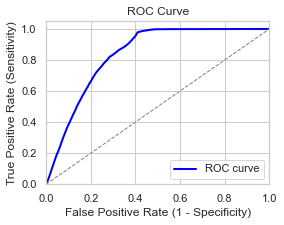

In [37]:
y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [38]:
roc_auc_score(y_test, y_score)

0.83585349142082

* <span style="color:blue; font-weight:bold;">roc_auc_score: 0.836 for Logistic Regression Classifier as Baseline</span>

### 2. Decision Tree Classifier

In [31]:
# Define the Decision Tree classifier
dt_model = DecisionTreeClassifier(class_weight='balanced')

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          # Split criterion
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the tree
    'min_samples_split': randint(2, 20),        # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider at each split
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(dt_model, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 17}
Best cross-validation score: 0.42


In [32]:
filename = 'dt_model.sav'
pickle.dump(random_search, open(filename, 'wb'))

In [33]:
filename = 'dt_model.sav'
dt_load = pickle.load(open(filename, 'rb'))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     83603
           1       0.28      0.85      0.42     11675

    accuracy                           0.72     95278
   macro avg       0.63      0.77      0.62     95278
weighted avg       0.89      0.72      0.76     95278



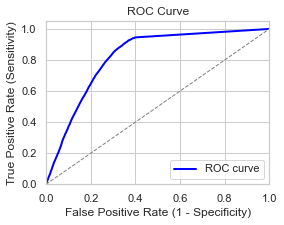

0.819767038061834

In [34]:
y_pred=dt_load.predict(x_test)

print (classification_report(y_test, y_pred))

y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc_score(y_test, y_score)

* <span style="color:blue; font-weight:bold;">roc_auc_score: 0.820 for Decision Tree Classifier</span>

### 3. Random Forest Classifier

In [43]:
clf = RandomForestClassifier(class_weight='balanced')

param_grid = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

random_search = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 20, 
                               cv = 5, scoring='f1', verbose= 1, random_state= 101, n_jobs = -1)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, scoring='f1', verbose=1)

#### Save model

In [44]:
filename = 'rf_model.sav'
pickle.dump(random_search, open(filename, 'wb'))

In [45]:
# filename = 'rf_model.sav'
# rf_load = pickle.load(open(filename, 'rb'))

#### Evaluate Model

In [46]:
y_pred=random_search.predict(x_test)

#### Classification Report

In [47]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80     83603
           1       0.28      0.92      0.43     11675

    accuracy                           0.70     95278
   macro avg       0.63      0.79      0.61     95278
weighted avg       0.90      0.70      0.75     95278



#### ROC AUC of Random Forest Classifier

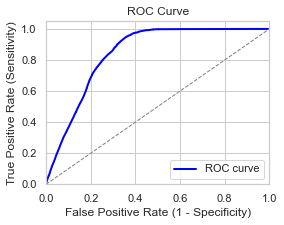

In [48]:
y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [49]:
roc_auc_score(y_test, y_score)

0.8425289104073777

* <span style="color:blue; font-weight:bold;">roc_auc_score: 0.843 for Random Forest classifier</span>

### 4. XGBoost Classifier

In [50]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_lambda': [0, 1, 2],  # L2 regularization term on weights
    'scale_pos_weight': [1, 10, 100, 1000]  # Control the balance of positive and negative weights, useful for imbalanced classes
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=50, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Best parameters found:  {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 0, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best cross-validation score: 0.42


In [51]:
# filename = 'xgb_model.sav'
# pickle.dump(random_search, open(filename, 'wb'))

In [52]:
# filename = 'xgb_model.sav'
# xgb_load = pickle.load(open(filename, 'rb'))

In [53]:
import joblib
# Save model
filename = 'xgb_model.joblib'
joblib.dump(random_search, filename)

['xgb_model.joblib']

In [47]:
# Load model
filename = 'xgb_model.joblib'
xgb_load = joblib.load(filename)

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     83603
           1       0.27      0.95      0.42     11675

    accuracy                           0.68     95278
   macro avg       0.63      0.80      0.60     95278
weighted avg       0.90      0.68      0.74     95278



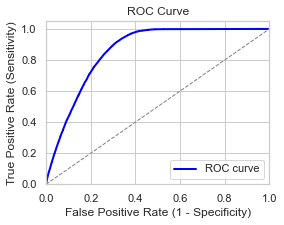

0.8576216922637916

In [55]:
y_pred=xgb_load.predict(x_test)

print (classification_report(y_test, y_pred))


y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc_score(y_test, y_score)

* <span style="color:blue; font-weight:bold;">roc_auc_score: 0.858 for XGBoost Classifier</span>

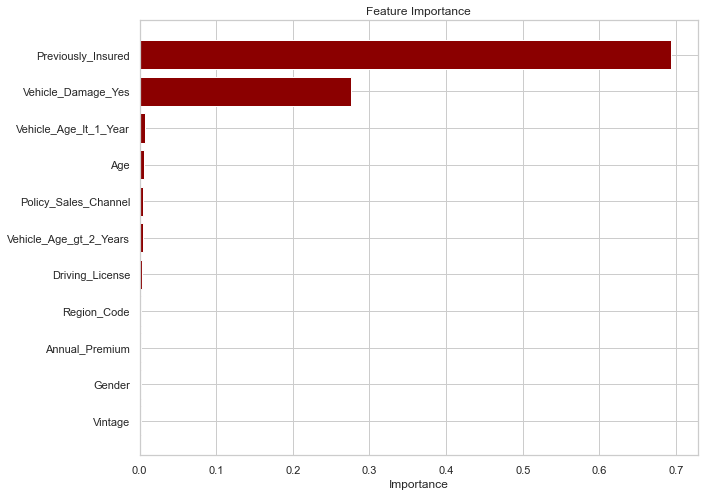

In [56]:
# Get the best estimator from RandomizedSearchCV
best_xgb = xgb_load.best_estimator_

# Extract feature importances
importances = best_xgb.feature_importances_

# Get feature names (assuming x_train is a DataFrame with columns)
feature_names = x_train.columns

# Create a DataFrame to hold the feature names and their importance
feature_importance_df = pd.DataFrame(list(zip(feature_names, importances)), columns=['Feature', 'Importance'])

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkred')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [57]:
# pip install shap

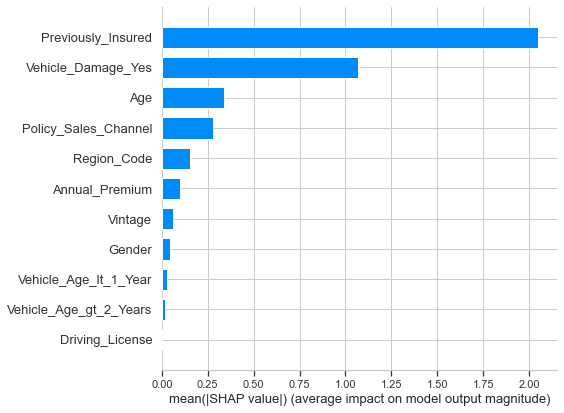

In [58]:
import shap

# Assuming random_search is already fitted as per your code
# best_xgb = random_search.best_estimator_

# Initialize TreeExplainer with the best XGBoost model and training data
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(x_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, x_train, plot_type='bar', show=False)
plt.show()


* **As observed in EDA: 1. Previously_Insured & 2. Vehicle_Damage_Yes are the top2 most important features**!

### 5. try some other models: 
    a. SVM Classifier:

In [35]:
# cyin: foudn SVM very slow even without hyperparameter tuning; try others
# Support Vector Machines (SVMs) can be slower than other models, especially when dealing with large datasets.
# if speed is a critical factor, you might prefer Decision Trees or Random Forests over SVMs.
# from sklearn.svm import SVC

In [ ]:
# # Define the SVM classifier
# svm_model = SVC(class_weight='balanced')

# # # Define the parameter grid
# # param_grid = {
# #     'C': uniform(0.1, 10),                  # Regularization parameter
# #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
# #     'degree': randint(2, 5),                # Degree for 'poly' kernel
# #     'gamma': ['scale', 'auto'],             # Kernel coefficient
# #     'coef0': uniform(0, 1)                  # Independent term in kernel function for 'poly' and 'sigmoid'
# # }

# # # Create the RandomizedSearchCV object
# # random_search = RandomizedSearchCV(svm_model, param_distributions=param_grid,
# #                                    n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# # # Perform the random search
# # random_search.fit(x_train, y_train)
# svm_model.fit(x_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

    b. KNeighborsClassifier:

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# For K-Nearest Neighbors (KNN), there isn't a direct class_weight parameter like there is for some other classifiers (such as RandomForestClassifier) 
# If you want to handle class imbalance directly within the training process, you might consider using a method like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset before fitting the KNN model.

In [34]:
# Define the KNN classifier
clf = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': randint(1, 31),              # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],         # Weight function used in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'knn__leaf_size': randint(20, 50),               # Leaf size passed to BallTree or KDTree
    'knn__p': [1, 2]                                 # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Create a pipeline that includes SMOTE and KNN
pipeline = Pipeline([
    ('smote', SMOTE(random_state=101)),
    ('knn', clf)
])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   n_iter=20, cv=5, scoring='f1', verbose=1, 
                                   random_state=101, n_jobs=-1)

# Perform the random search
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'knn__algorithm': 'ball_tree', 'knn__leaf_size': 39, 'knn__n_neighbors': 28, 'knn__p': 1, 'knn__weights': 'uniform'}
Best cross-validation score: 0.42


In [35]:
# import joblib
# Save model
filename = 'knn_model.joblib'
joblib.dump(random_search, filename)

['knn_model.joblib']

In [36]:
# Load model
filename = 'knn_model.joblib'
knn_load = joblib.load(filename)

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     83603
           1       0.28      0.85      0.42     11675

    accuracy                           0.71     95278
   macro avg       0.62      0.77      0.61     95278
weighted avg       0.89      0.71      0.76     95278



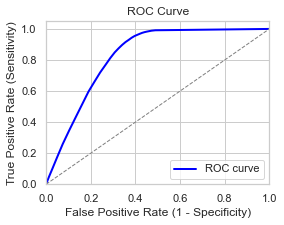

0.8251736758009539

In [37]:
y_pred=knn_load.predict(x_test)

print (classification_report(y_test, y_pred))


y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc_score(y_test, y_score)

    c. Naive Bayes classifier:

In [39]:
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Define the parameter grid
param_grid = {
    'clf__var_smoothing': uniform(1e-9, 1e-2)  # Var smoothing parameter
}

# Create a pipeline that includes SMOTE and GaussianNB
pipeline = Pipeline([
    ('smote', SMOTE(random_state=101)),
    ('clf', clf)
])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='f1', verbose=1, 
                                   random_state=101, n_jobs=-1)

# Perform the random search
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'clf__var_smoothing': 0.00028474326478096946}
Best cross-validation score: 0.36


In [40]:
# import joblib
# Save model
filename = 'nb_model.joblib'
joblib.dump(random_search, filename)

['nb_model.joblib']

In [41]:
# Load model
filename = 'nb_model.joblib'
nb_load = joblib.load(filename)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     83603
           1       0.23      0.89      0.36     11675

    accuracy                           0.62     95278
   macro avg       0.60      0.73      0.54     95278
weighted avg       0.88      0.62      0.68     95278



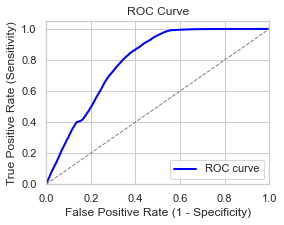

0.7881776319154556

In [42]:
y_pred=nb_load.predict(x_test)

print (classification_report(y_test, y_pred))


y_score = random_search.predict_proba(x_test)[:,1]
# Compute ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc_score(y_test, y_score)

# 4. Evaluating on Test data using the best model, XGBoost Classifier

In [45]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.076923,1,-1.163269,1,0.273448,152.0,-1.209522,1,0,0
1,1,0.307692,1,0.121953,0,0.138622,7.0,-0.516594,0,0,1
2,1,0.415385,1,0.121953,0,0.557487,124.0,0.534745,0,0,1
3,1,0.061538,1,0.046351,1,0.378031,152.0,0.391381,1,0,1
4,1,0.107692,1,0.121953,1,1.826272,152.0,1.705554,1,0,0


In [48]:
pred_res =xgb_load.predict(test)

In [49]:
# id_test =test.id

submission = pd.DataFrame(data = {'id': id_test, 'Response': pred_res})
submission.to_csv('Health Insurance Cross Sell Classifier_output.csv', index = False)
submission.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


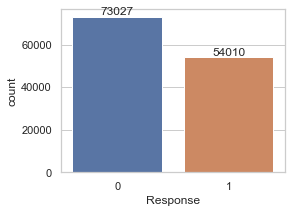

In [50]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=submission, x='Response')
# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [51]:
test_plot['Response'] = pred_res

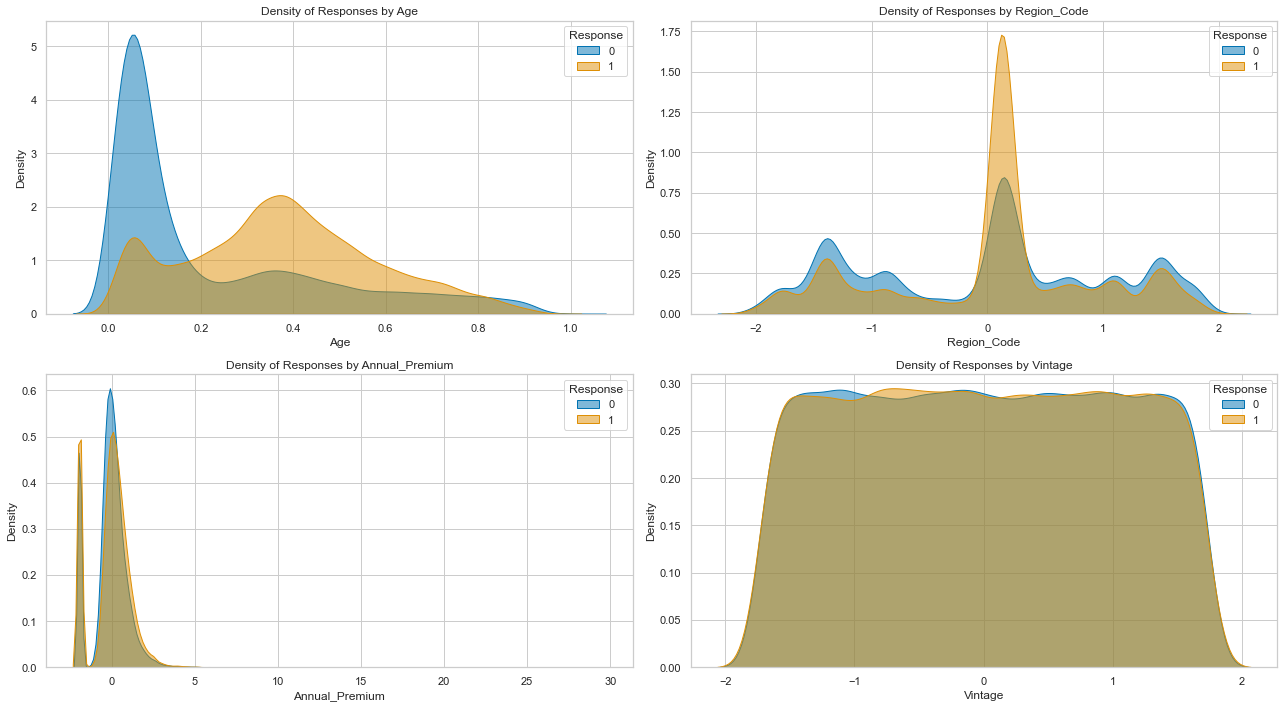

In [53]:
# cyin: to check distribution for test data to see how to prediction look like:
# plot distribution of numerical_columns by Response

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each numerical column and create a density plot
for i, num_col in enumerate(numerical_columns):
    # Determine the number of unique 'Response' categories
    num_categories = len(test_plot['Response'].unique())
    
    # Iterate over each unique 'Response' category
    for j, response_category in enumerate(test_plot['Response'].unique()):
        # Reverse the order of colors for the two curves
#         colors = sns.color_palette("colorblind", 2)[::-1]
        colors = sns.color_palette("colorblind", 2)
        color = colors[j % 2]  # Cycle through two colors
        
        sns.kdeplot(
            x=num_col,
            data=test_plot[test_plot['Response'] == response_category],
            ax=axes[i],
            fill=True,
            alpha=0.5,
            label=response_category,
            common_norm=False,  # Normalize within each hue category
            color=color  # Assign the reversed color to the current curve
        )
    
    axes[i].set_title(f'Density of Responses by {num_col}')
    
    # Manually add legend
    axes[i].legend(title='Response')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Summary
### Exploratory Data Analysis (EDA) and Data Preparation:
Conducted a comprehensive Exploratory Data Analysis (EDA) to understand the sales data.
Cleaned and analyzed the data to ensure it was ready for further processing.

### Feature Selection and Engineering:
Selected numerical data and incorporated categorical data as features for the model.
Developed custom transformer classes to streamline the modeling process.

### Modeling:

- Implemented a Logistic Regression model as a baseline to assess initial performance. Engaged in feature engineering to enhance the model's predictive capabilities. 
- Combined numerical and categorical data for a robust feature set. Applied hyperparameter tuning to further improve model performance.
- Trained and optimized multiple Classification models (Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN and Naive Bayes, etc.).

### Results:

XGBoost, the best-performing model, achieved a ROC AUC score of 0.86, providing actionable insights to tailor communication strategy, with potental $50M annual revenue increase.

# The End!

#### Web app:

In [ ]:
!pip install flask
!python app.py

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the model
xgb_model = joblib.load('xgb_model.joblib')

@app.route('/')
def home():
    return "Welcome to the XGBoost Model API!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Assuming the input data is a list of features
    prediction = xgb_model.predict([data['features']])
    return jsonify({'prediction': prediction[0]})        

if __name__ == '__main__':
    app.run(debug=True)
